In [1]:
# Importing the Libraries..
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the datasets...
data=pd.read_csv('Walmart.csv')

# Performming the EDA...


In [3]:
# First look of Data...
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
# Check the Unique feature of data
data.nunique()

Store             45
Date             143
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
dtype: int64

In [5]:
# To see the first 5 records of our data...
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [6]:
# checking the Null value...
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [7]:
# checking the duplicate values..
data.duplicated().sum()

0

In [8]:
data.head(2)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106


In [9]:
# We will perform the feature engineering on the date. we can separate Date as day, date, month & year

data['Day']=data['Date'].str.split('-').str[0]
data['Month']=data['Date'].str.split('-').str[1]
data['year']=data['Date'].str.split('-').str[2]
data.drop(['Date'],axis=1,inplace=True)
data

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,05,02,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,12,02,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,19,02,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,26,02,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,05,03,2010
...,...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,28,09,2012
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,05,10,2012
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,12,10,2012
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012


In [10]:
# checking the outliers...

col=data.columns

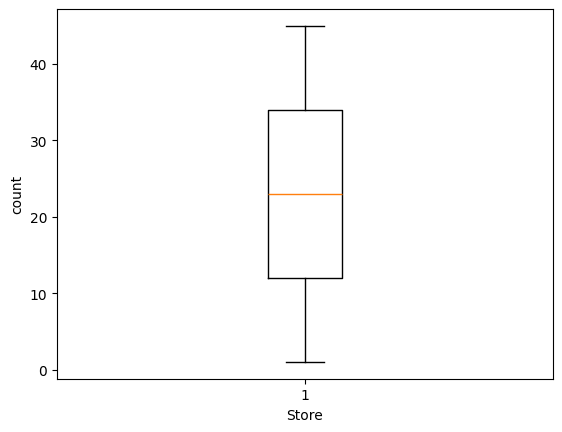

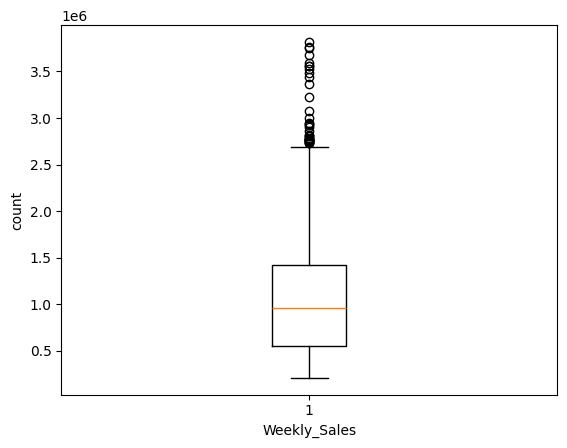

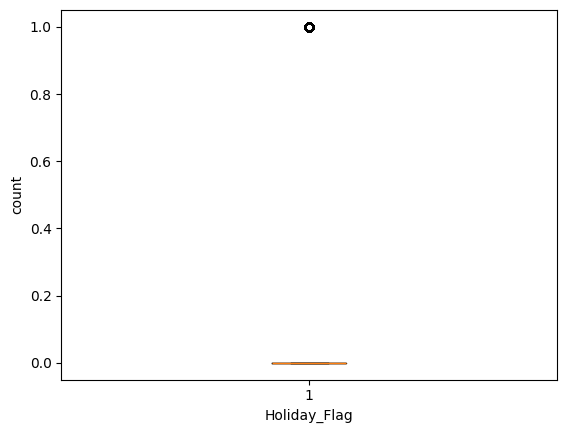

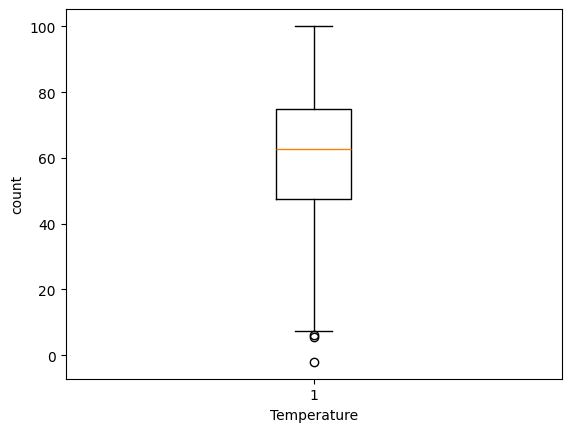

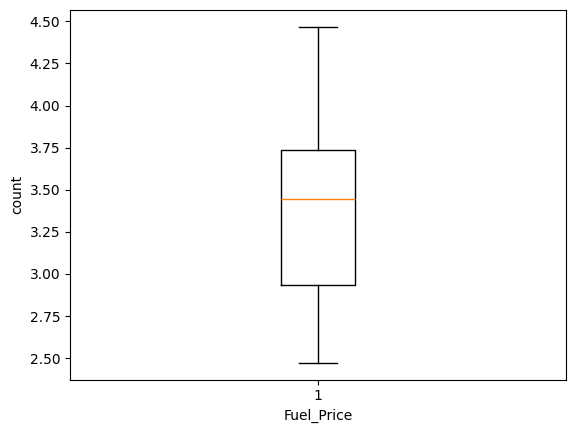

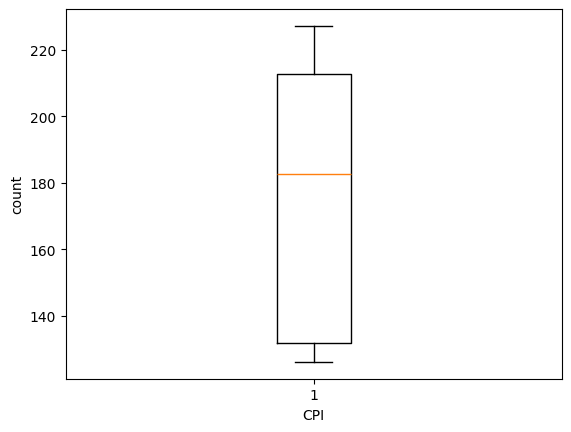

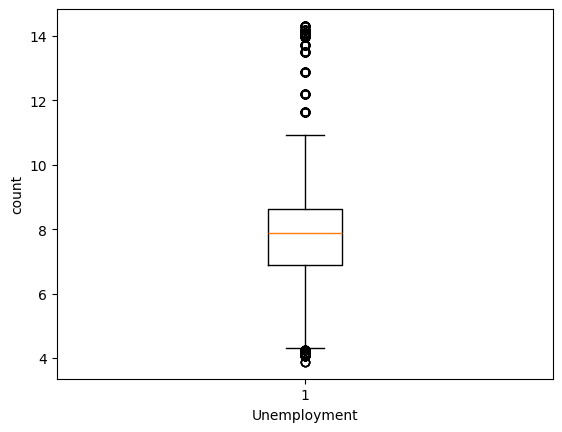

In [11]:
# perform the Outlier detection in Numerical Data..

for col_name in col:
    if(data[col_name].dtypes!='object'):
        plt.boxplot(data[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

In [12]:
# IQR -InterQuartile Range...

out_col=('Weekly_Sales','Temperature','Unemployment')

In [13]:
#Checking holiday Flag for Outliers...

data['Holiday_Flag'].value_counts()

Holiday_Flag
0    5985
1     450
Name: count, dtype: int64

In [14]:
# Calculate the Outliers by IQR method..
for i in out_col:
    Q1=data[i].quantile(0.25)
    Q3=data[i].quantile(0.75)
    IQR=Q3-Q1
    LQR=Q1-1.5*IQR
    UQR=Q3+1.5*IQR
    data=data[(data[i]<=UQR)&(data[i]>=LQR)]

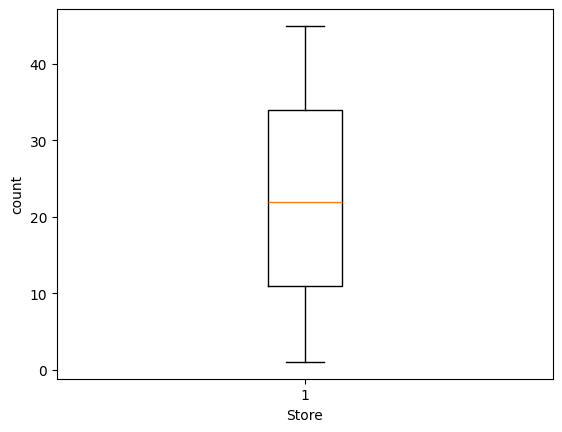

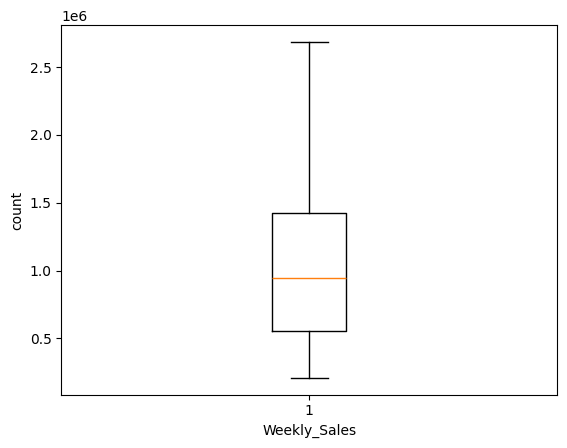

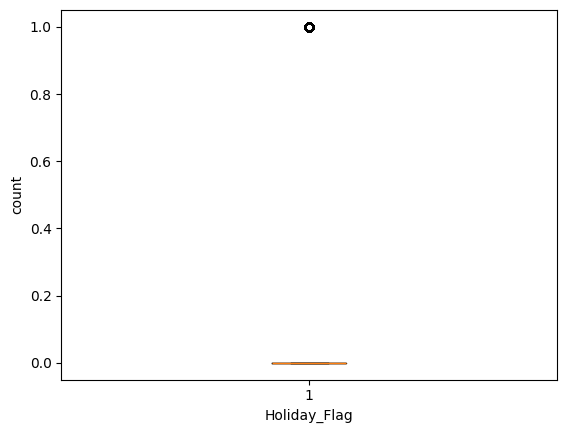

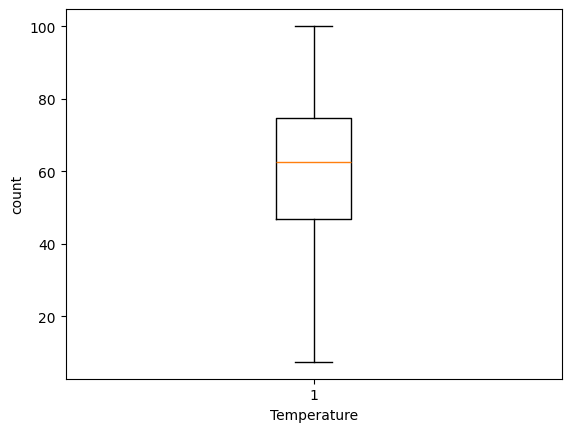

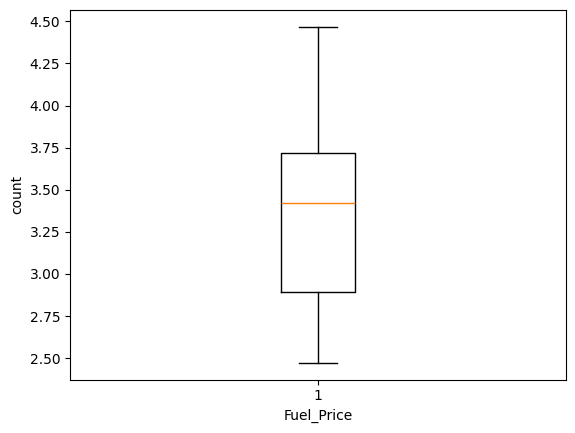

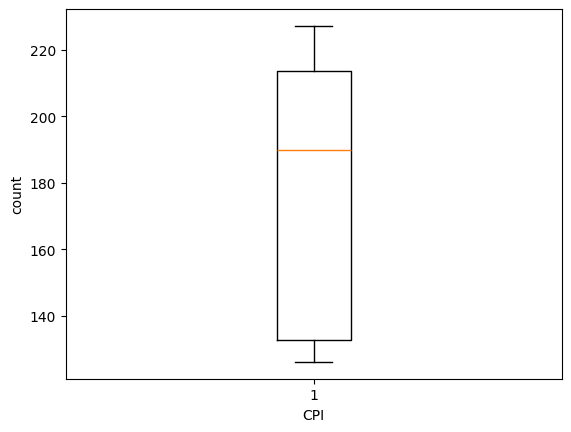

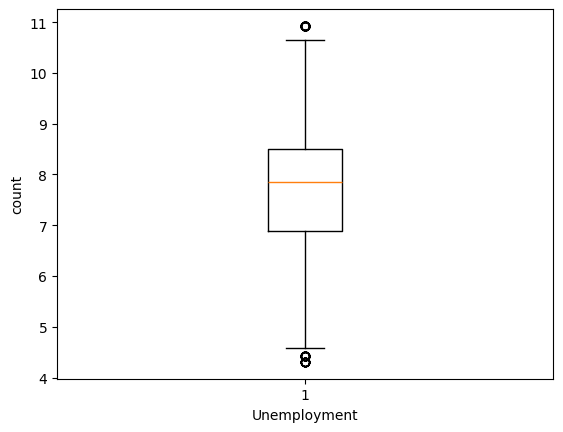

In [15]:
# Recheck the Outliers on performed features...
for col_name in col:
    if(data[col_name].dtypes!='object'):
        plt.boxplot(data[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

In [16]:
# after Outlier Removal we have the below data...
data.head(4)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,05,02,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,12,02,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,19,02,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,26,02,2010


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5917 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         5917 non-null   int64  
 1   Weekly_Sales  5917 non-null   float64
 2   Holiday_Flag  5917 non-null   int64  
 3   Temperature   5917 non-null   float64
 4   Fuel_Price    5917 non-null   float64
 5   CPI           5917 non-null   float64
 6   Unemployment  5917 non-null   float64
 7   Day           5917 non-null   object 
 8   Month         5917 non-null   object 
 9   year          5917 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 508.5+ KB


In [18]:
# Data Distribution in Categorica & Numerical 

col=data.columns
col

categorical_feature=[]
numerical_feature=[]

for col_name in col:
    if data[col_name].dtypes=='object':
        categorical_feature.append(col_name)
    else:
        numerical_feature.append(col_name)
print(categorical_feature)
print(numerical_feature)

['Day', 'Month', 'year']
['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']


In [19]:
# Checking the basis Statistic on data..

data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,5917.000000,5.917000e+03,5917.000000,5917.000000,5917.000000,5917.000000,5917.000000
mean,22.801251,1.039313e+06,0.069123,60.433407,3.340543,175.023148,7.722305
std,13.094060,5.519450e+05,0.253684,18.386455,0.458200,39.023139,1.243337
min,1.000000,2.099862e+05,0.000000,7.460000,2.472000,126.064000,4.308000
25%,11.000000,5.525292e+05,0.000000,46.980000,2.891000,132.767067,6.891000
50%,22.000000,9.472292e+05,0.000000,62.620000,3.420000,190.006988,7.852000
75%,34.000000,1.427624e+06,0.000000,74.730000,3.721000,213.799099,8.494000
max,45.000000,2.685352e+06,1.000000,100.140000,4.468000,227.232807,10.926000


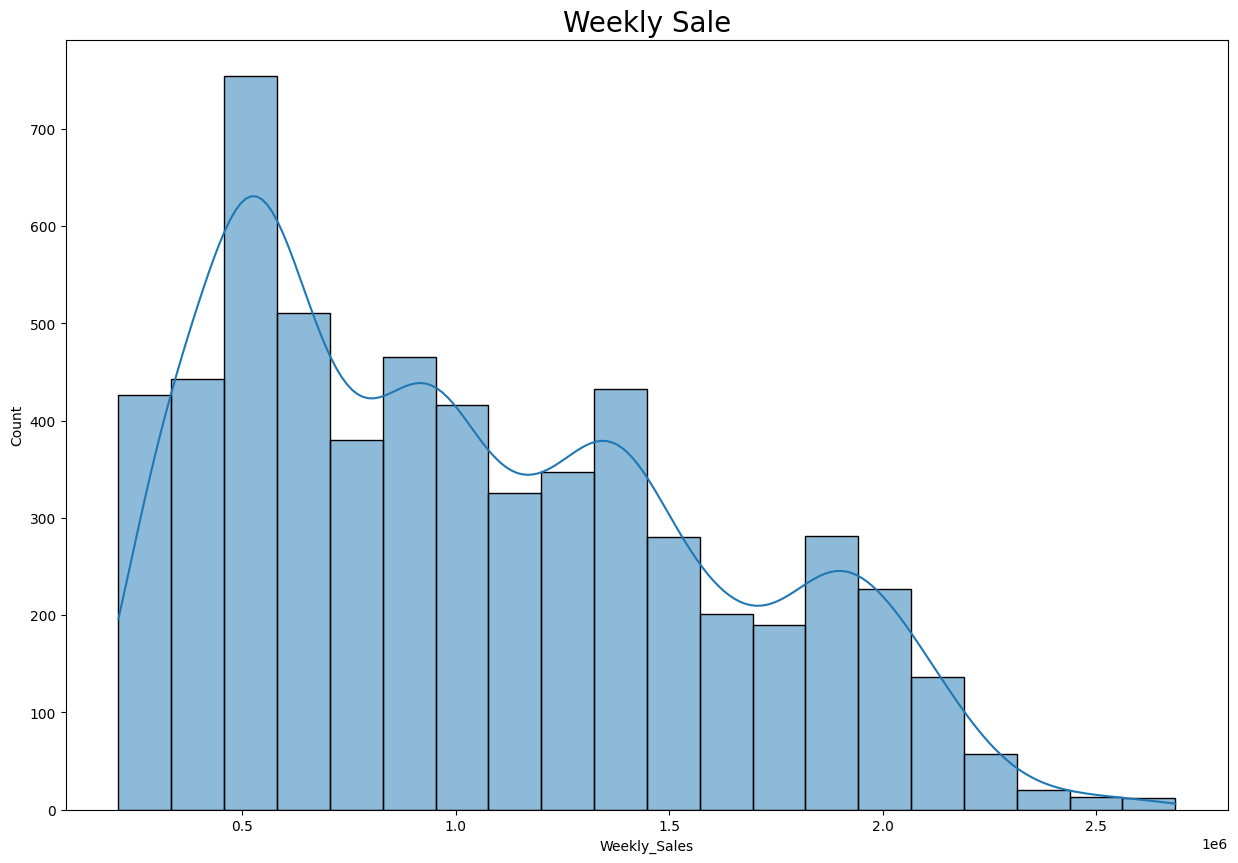

In [20]:
#Plotting on Weeklkly Sales
plt.figure(figsize=(15,10))
ax=sns.histplot(data['Weekly_Sales'],kde=True,bins=20)
plt.title('Weekly Sale',fontsize=20)
plt.show()

# in above graph shows that our weekly sales is not normally distributed, its skewed to right

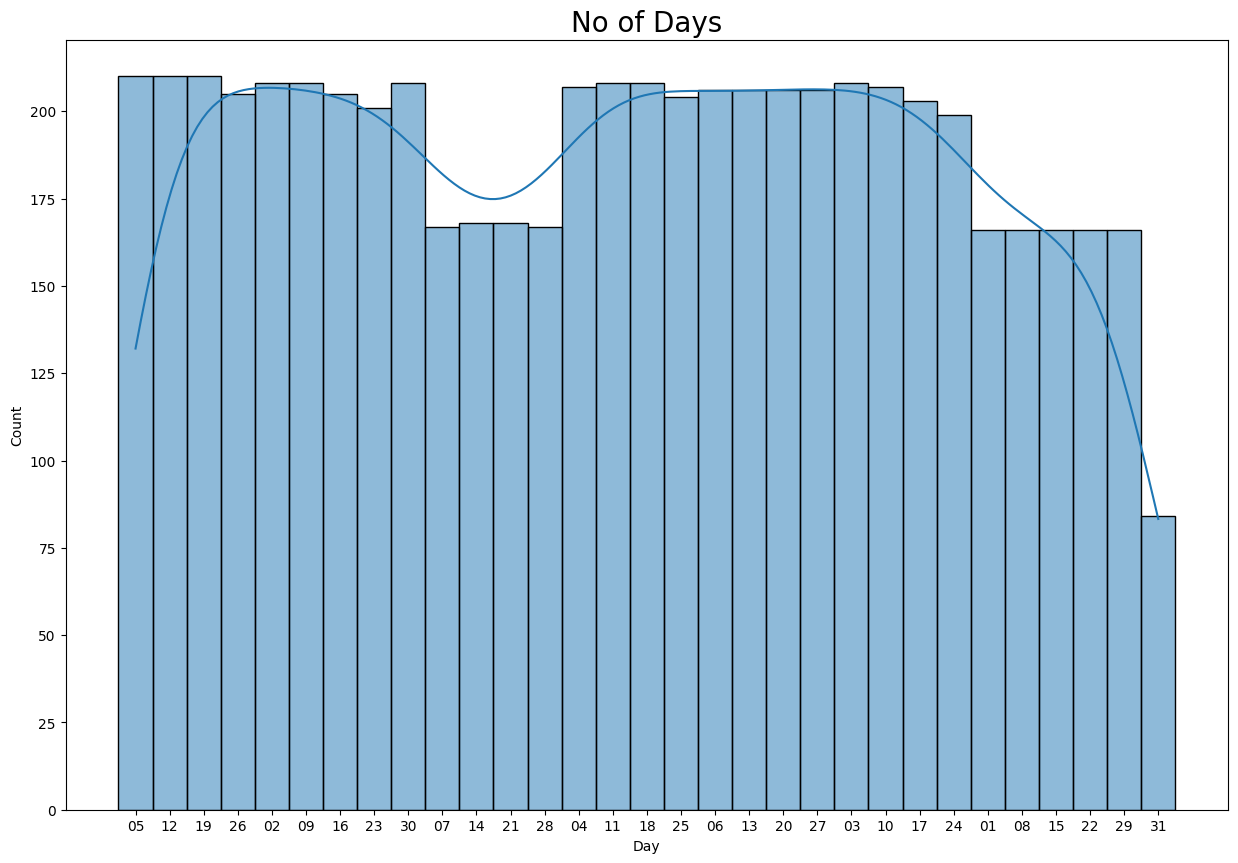

In [21]:
# Ploting on Categorical Data..

# Day wise sales

plt.figure(figsize=(15,10))
ax=sns.histplot(data['Day'],kde=True,bins=20)
plt.title('No of Days',fontsize=20)
plt.show()

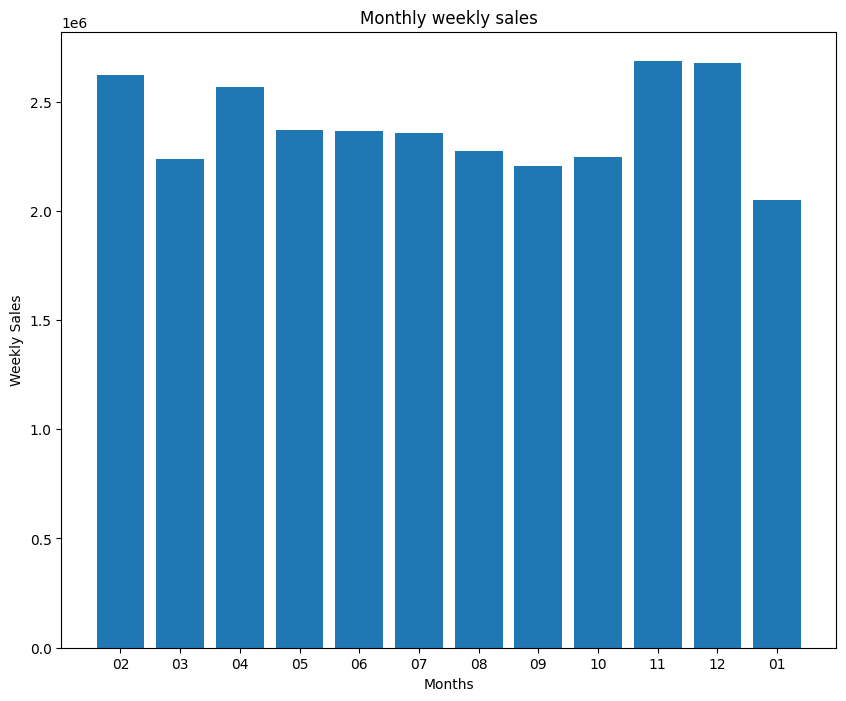

In [22]:
# Month Wise Sale

plt.figure(figsize=(10,8))
plt.bar(data['Month'],data['Weekly_Sales'])
plt.xlabel('Months')
plt.ylabel('Weekly Sales')
plt.title('Monthly weekly sales')
plt.show()

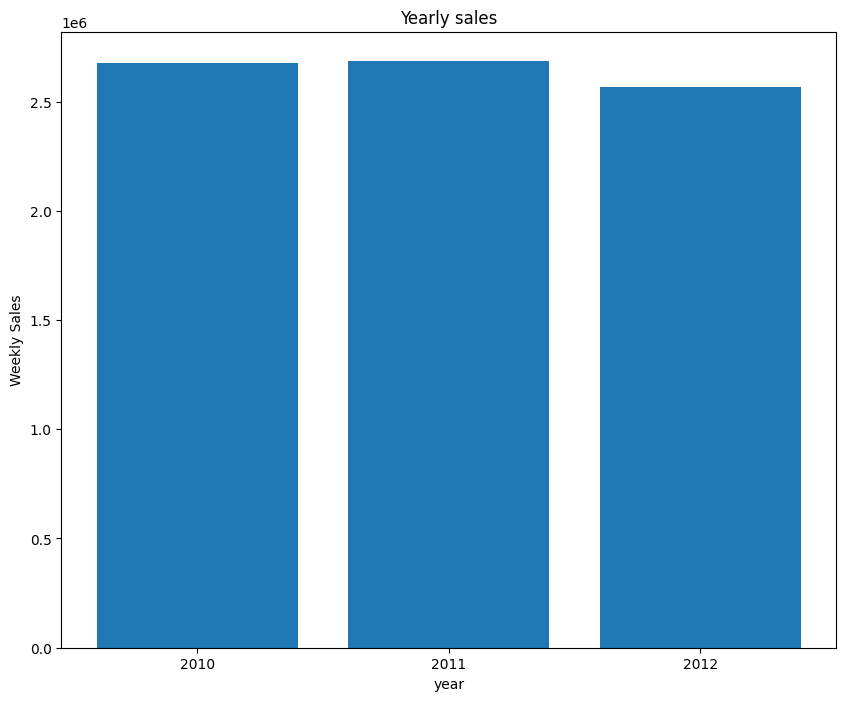

In [23]:
# Yearly sale

plt.figure(figsize=(10,8))
plt.bar(data['year'],data['Weekly_Sales'])
plt.xlabel('year')
plt.ylabel('Weekly Sales')
plt.title('Yearly sales')
plt.show()

#### Per above plot we can see in year 2011 walmart store has more transactions other than year 2010 & 2012

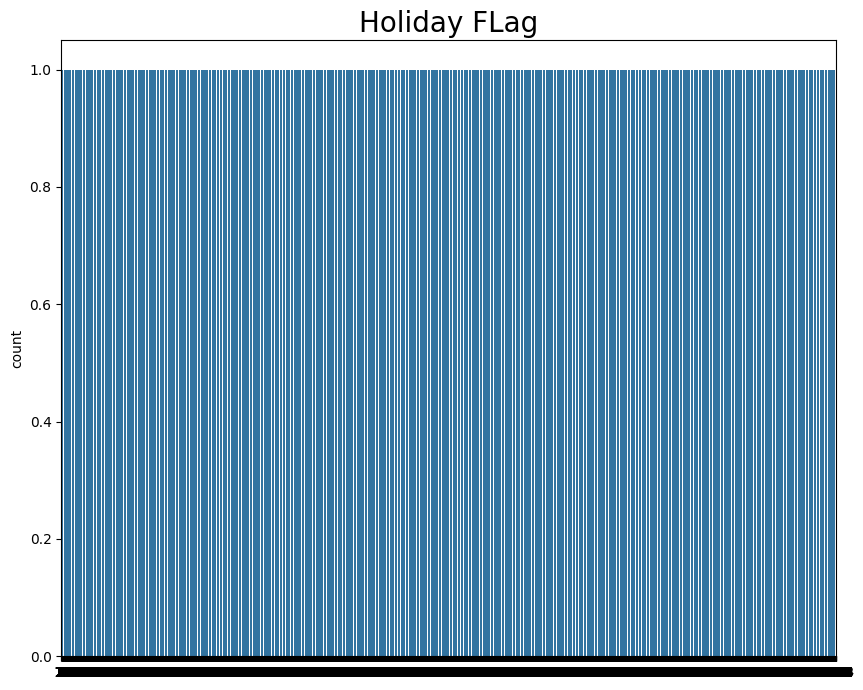

In [24]:
# Plotting on Numerical Data....

# Holiday Flag

plt.figure(figsize=(10,8))
ax=sns.countplot(data['Holiday_Flag'],)
plt.title('Holiday FLag',fontsize=20)
plt.show()

#### from above graph we consider that 0 for no holiday and 1 is for holday. People wants to go more in non holidays

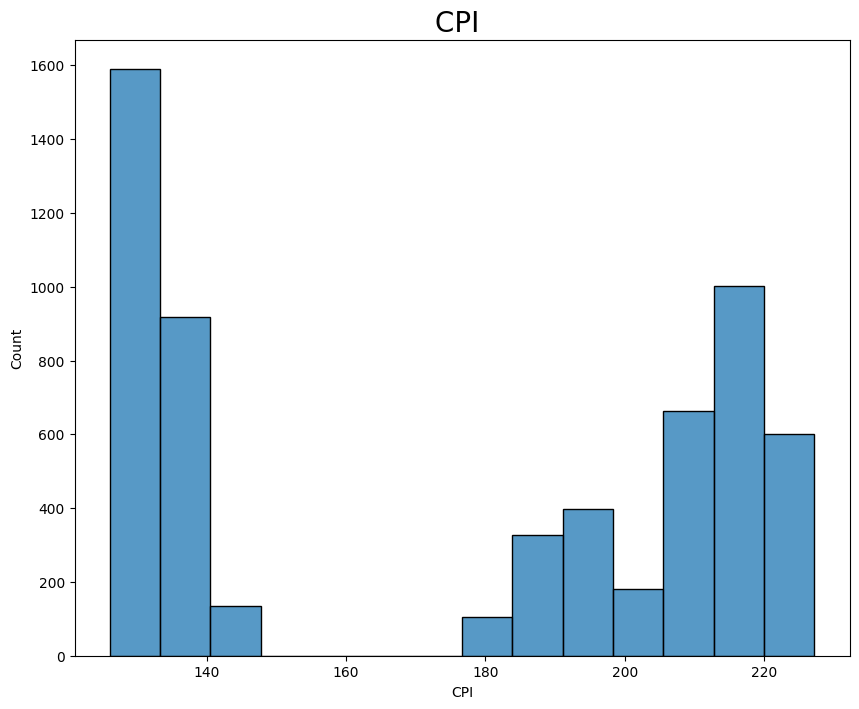

In [25]:
# CPI plotting...

plt.figure(figsize=(10,8))
ax=sns.histplot(data['CPI'],)
plt.title('CPI ',fontsize=20)
plt.show()

#### in above plot people have 0 to 120 have more CPI 

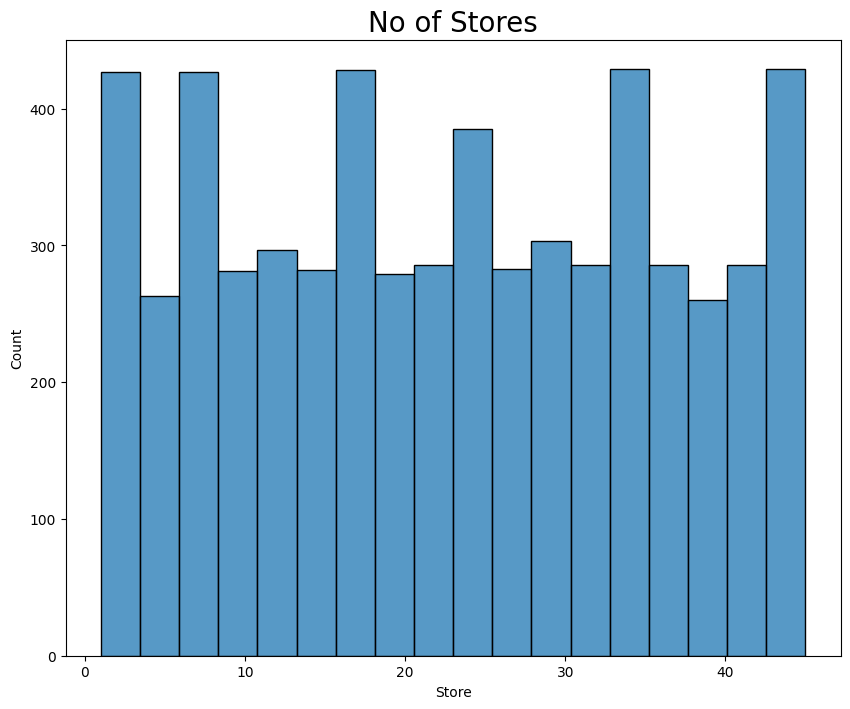

In [26]:
# Store plotting...
plt.figure(figsize=(10,8))
ax=sns.histplot(data['Store'])
plt.title('No of Stores',fontsize=20,)
plt.show()

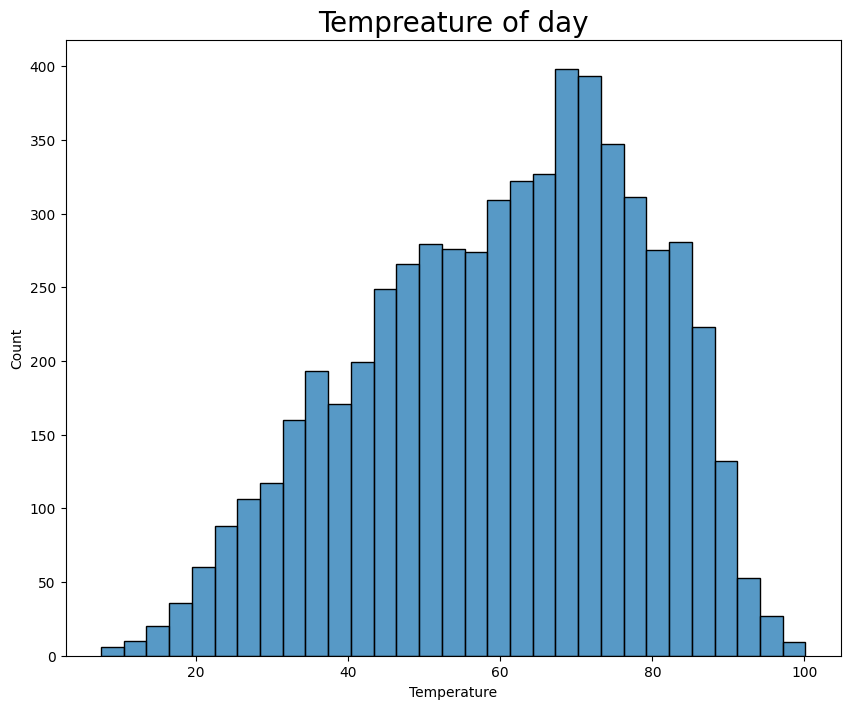

In [27]:
plt.figure(figsize=(10,8))
ax=sns.histplot(data['Temperature'])
plt.title('Tempreature of day',fontsize=20,)
plt.show()

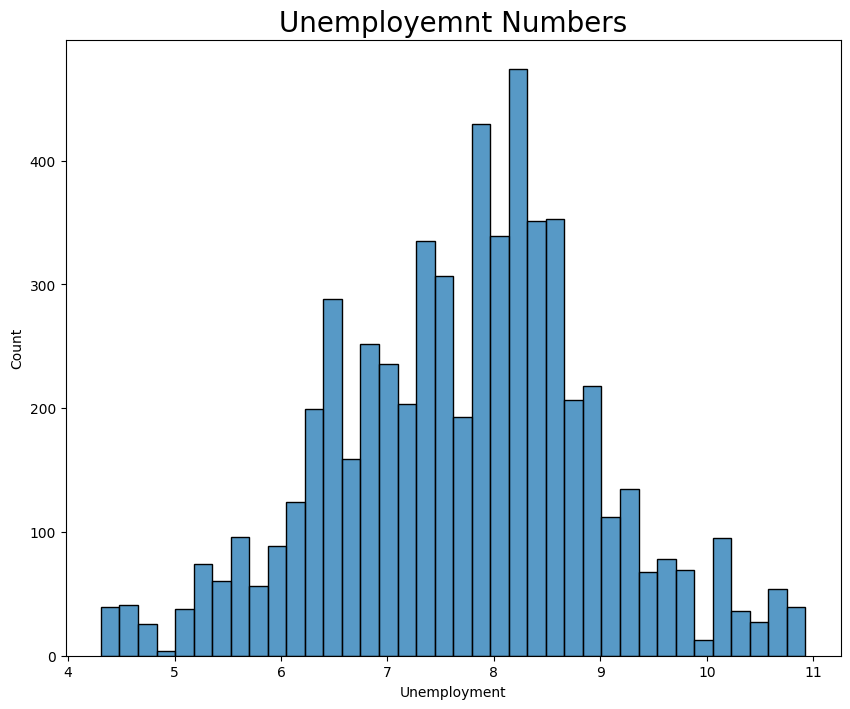

In [28]:
plt.figure(figsize=(10,8))
ax=sns.histplot(data['Unemployment'])
plt.title('Unemployemnt Numbers',fontsize=20,)
plt.show()

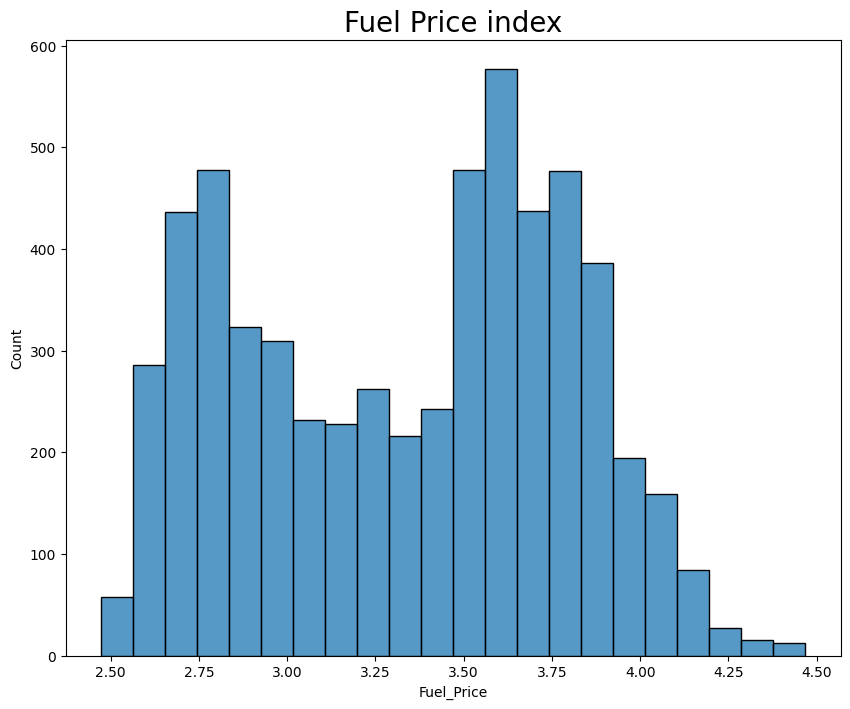

In [29]:
plt.figure(figsize=(10,8))
ax=sns.histplot(data['Fuel_Price'])
plt.title('Fuel Price index',fontsize=20,)
plt.show()

In [30]:
# Overall Correlation with numerical data
data.corr()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,year
Store,1.000000,-0.319354,0.004289,-0.027045,0.047519,-0.208637,0.309645,0.003400,0.013566,-0.007421
Weekly_Sales,-0.319354,1.000000,0.024390,-0.041686,0.019664,-0.082977,-0.073092,-0.031838,0.042940,-0.021170
Holiday_Flag,0.004289,0.024390,1.000000,-0.157220,-0.076529,-0.000450,0.011031,0.040522,0.119797,-0.053861
Temperature,-0.027045,-0.041686,-0.157220,1.000000,0.145157,0.217847,0.024204,0.029903,0.244484,0.083390
Fuel_Price,0.047519,0.019664,-0.076529,0.145157,1.000000,-0.144515,-0.105214,0.032052,-0.029555,0.782957
CPI,-0.208637,-0.082977,-0.000450,0.217847,-0.144515,1.000000,-0.219020,0.004439,0.000345,0.086930
Unemployment,0.309645,-0.073092,0.011031,0.024204,-0.105214,-0.219020,1.000000,-0.000208,-0.009387,-0.242435
Day,0.003400,-0.031838,0.040522,0.029903,0.032052,0.004439,-0.000208,1.000000,0.008431,0.009835
Month,0.013566,0.042940,0.119797,0.244484,-0.029555,0.000345,-0.009387,0.008431,1.000000,-0.182152
year,-0.007421,-0.021170,-0.053861,0.083390,0.782957,0.086930,-0.242435,0.009835,-0.182152,1.000000


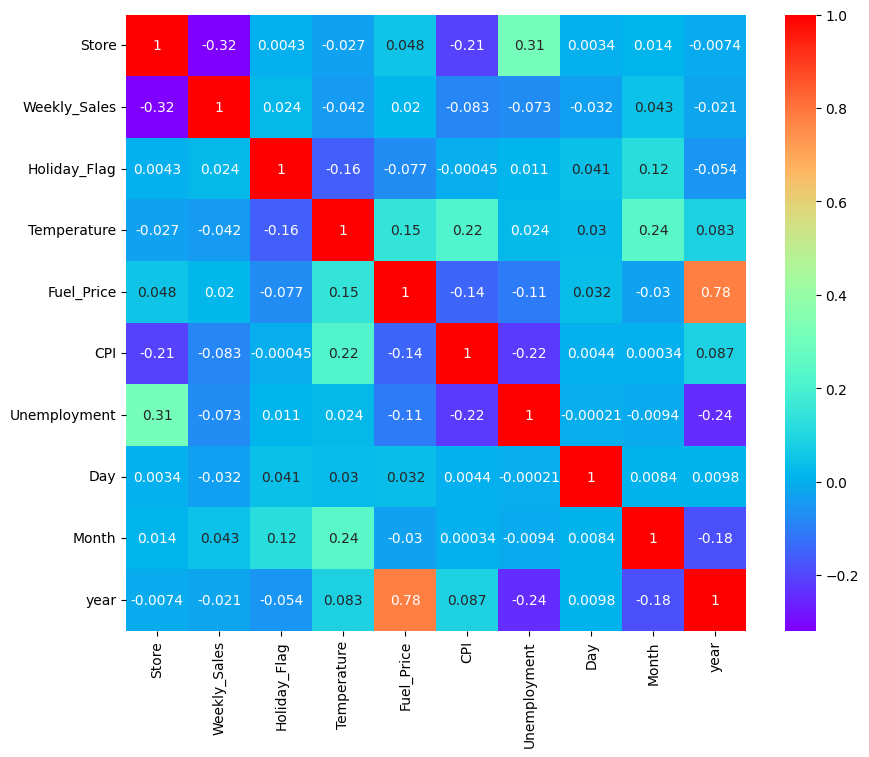

In [31]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,cmap='rainbow')
plt.show()

#### As per above graph we can find that CPI & Unemployment has lest correlation with each others

In [32]:
data.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,05,02,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,12,02,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,19,02,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,26,02,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,05,03,2010


#### If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?

In [33]:
total_sale = data.groupby('Weekly_Sales')[['Unemployment', 'Store']].sum().reset_index()
total_sale

,Weekly_Sales,Unemployment,Store
0,209986.25,9.265,33
1,213538.32,9.265,33
2,215359.21,8.010,33
3,219804.85,9.265,33
4,220060.35,8.010,33
...,...,...,...
5912,2627910.75,8.021,27
5913,2644633.02,6.551,6
5914,2658725.29,8.163,2
5915,2678206.42,8.067,19


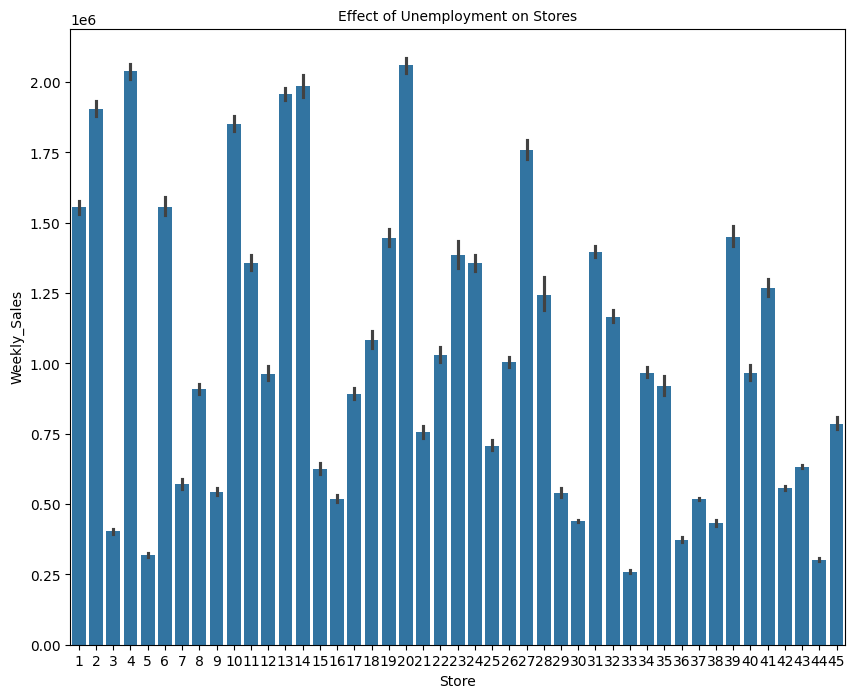

In [34]:
plt.figure(figsize=(10,8))
sns.barplot(x='Store',y='Weekly_Sales',data=total_sale)
plt.xlabel('Store',fontsize=10)
plt.ylabel('Weekly_Sales',fontsize=10)
plt.title('Effect of Unemployment on Stores',fontsize=10)
plt.show()

#### As per above graph the Store # 33 is most afected store from unemployment....

#### If the weekly sales show a seasonal trend, when and what could be the reason?

In [35]:
df=pd.read_csv('Walmart.csv')
df.head(2)

df=df.iloc[:,:3]
df

df.index=df['Date']
df.head()

,Store,Date,Weekly_Sales
Date,,,
05-02-2010,1,05-02-2010,1643690.90
12-02-2010,1,12-02-2010,1641957.44
19-02-2010,1,19-02-2010,1611968.17
26-02-2010,1,26-02-2010,1409727.59
05-03-2010,1,05-03-2010,1554806.68


<Axes: xlabel='Date'>

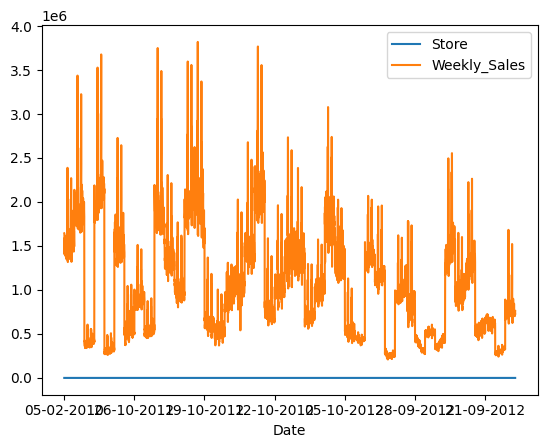

In [36]:
df.plot()

#### As per above graph data is looks Seasonal trend 

#### Does temperature affect the weekly sales in any manner?


In [37]:
# Convert the 'Day' column to numeric
data['Day'] = pd.to_numeric(data['Day'])

# Group by 'Weekly_Sales' and compute the mean of 'Temperature', 'Store', and 'Day'
total_sale = data.groupby('Weekly_Sales')[['Temperature', 'Store', 'Day']].mean().reset_index()

# Print the result
print(total_sale)

      Weekly_Sales  Temperature  Store   Day
0        209986.25        52.82   33.0   3.0
1        213538.32        71.34   33.0  29.0
2        215359.21        51.60   33.0  30.0
3        219804.85        52.91   33.0  31.0
4        220060.35        59.12   33.0   2.0
...            ...          ...    ...   ...
5912    2627910.75        46.67   27.0  26.0
5913    2644633.02        49.45    6.0  23.0
5914    2658725.29        62.98    2.0  26.0
5915    2678206.42        26.05   19.0  24.0
5916    2685351.81        48.71   14.0  25.0

[5917 rows x 4 columns]


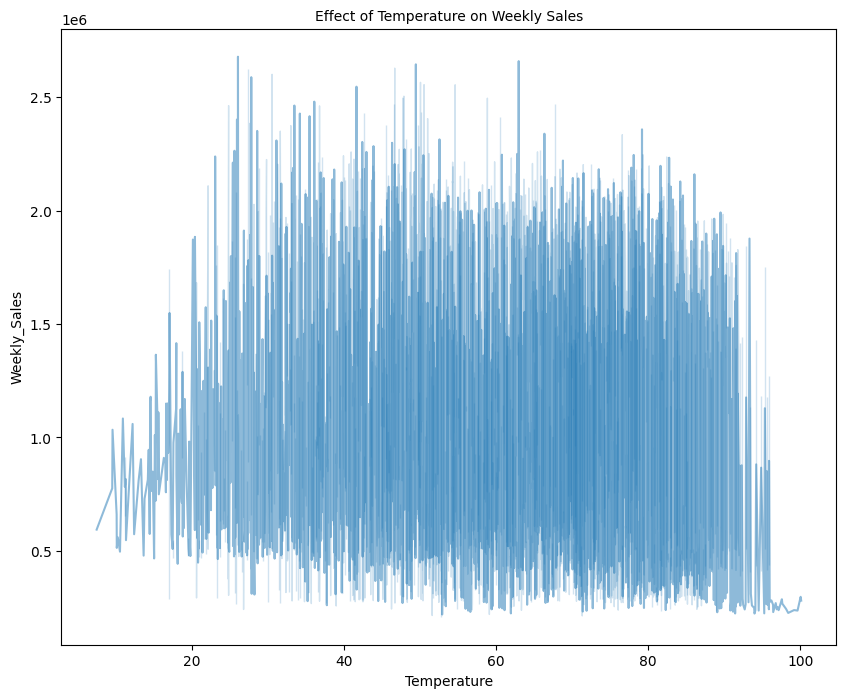

In [38]:
plt.figure(figsize=(10,8))
sns.lineplot(x='Temperature',y='Weekly_Sales',data=data,alpha=0.5)
plt.xlabel('Temperature',fontsize=10)
plt.ylabel('Weekly_Sales',fontsize=10)
plt.title('Effect of Temperature on Weekly Sales',fontsize=10)
plt.show()

#### As per above graph we can see there not much impact of Tempreature on Weekly Sales...

#### How is the Consumer Price index affecting the weekly sales of various stores?

In [39]:
Store_Avg = data.groupby('Store')[['CPI', 'Weekly_Sales']].mean().reset_index()
Store_Avg

,Store,CPI,Weekly_Sales
0,1,215.996892,1.555264e+06
1,2,215.655023,1.905830e+06
2,3,219.391531,4.027044e+05
3,4,128.380156,2.038739e+06
4,5,216.565581,3.180118e+05
5,6,217.585850,1.556539e+06
6,7,193.677635,5.707060e+05
7,8,219.439026,9.087495e+05
8,9,219.626689,5.439806e+05
9,10,128.701735,1.852745e+06


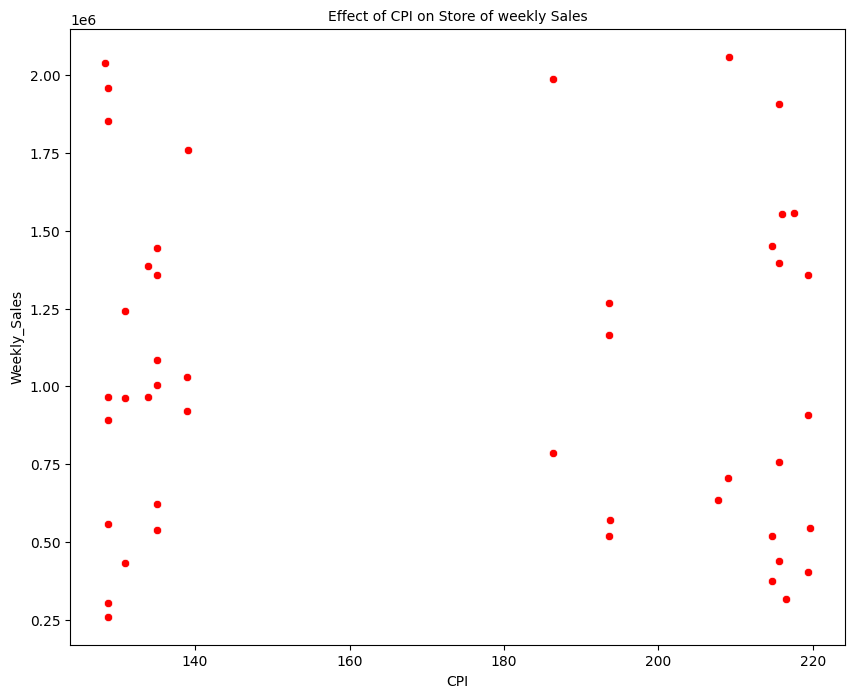

In [40]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='CPI',y='Weekly_Sales',data=Store_Avg,color='red')
plt.xlabel('CPI',fontsize=10)
plt.ylabel('Weekly_Sales',fontsize=10)
plt.title('Effect of CPI on Store of weekly Sales',fontsize=10)
plt.show()

#### As per above scatter graph thr relationship b/w Sore and CPI...

### Top performing stores according to the historical data.


<Axes: title={'center': 'Total Sale for top performing store'}, xlabel='Store', ylabel='Weekly_Sales'>

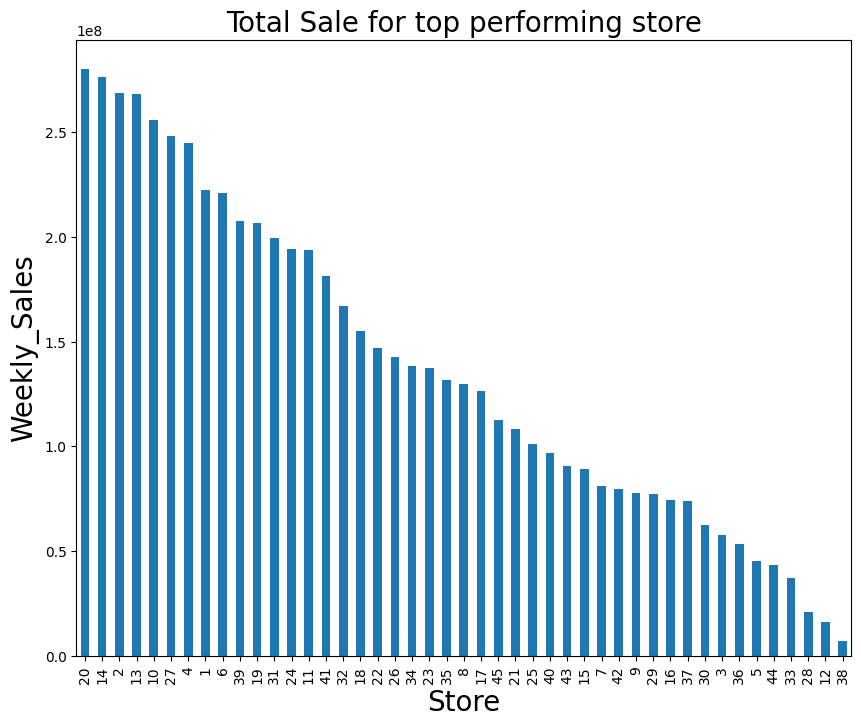

In [41]:
t_sale=data.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)
t_sale_array=np.array(t_sale)
plt.figure(figsize=(10,8))
plt.xticks(rotation=0)
plt.title('Total Sale for top performing store',fontsize=20)
plt.xlabel('Store',fontsize=20)
plt.ylabel('Weekly_Sales',fontsize=20)
t_sale.plot(kind='bar')

#### As per above graph the top performing Store is Store#20

In [42]:
store_sale=data.groupby('Store')['Weekly_Sales'].sum()
# Sort the store values
store_sale=store_sale.sort_values(ascending=False)

print("Top Performing Store:")

print("*********")
print(store_sale.head())

Top Performing Store:
*********
Store
20    2.800237e+08
14    2.761276e+08
2     2.687221e+08
13    2.682025e+08
10    2.556789e+08
Name: Weekly_Sales, dtype: float64


### The worst performing store, and how significant is the difference between the highest and lowest performing stores.


In [43]:
store_sale=data.groupby('Store')['Weekly_Sales'].sum()

In [44]:
worst_performing_sotre=store_sale.idxmin()
print(f"worst performing Store:{worst_performing_sotre}")
best_performing_sotre=store_sale.idxmax()
print(f"Best performing Store:{best_performing_sotre}")
Store_diff=store_sale.idxmax()-store_sale.idxmin()
print(f"Different Stores:{Store_diff}")

worst performing Store:38
Best performing Store:20
Different Stores:-18


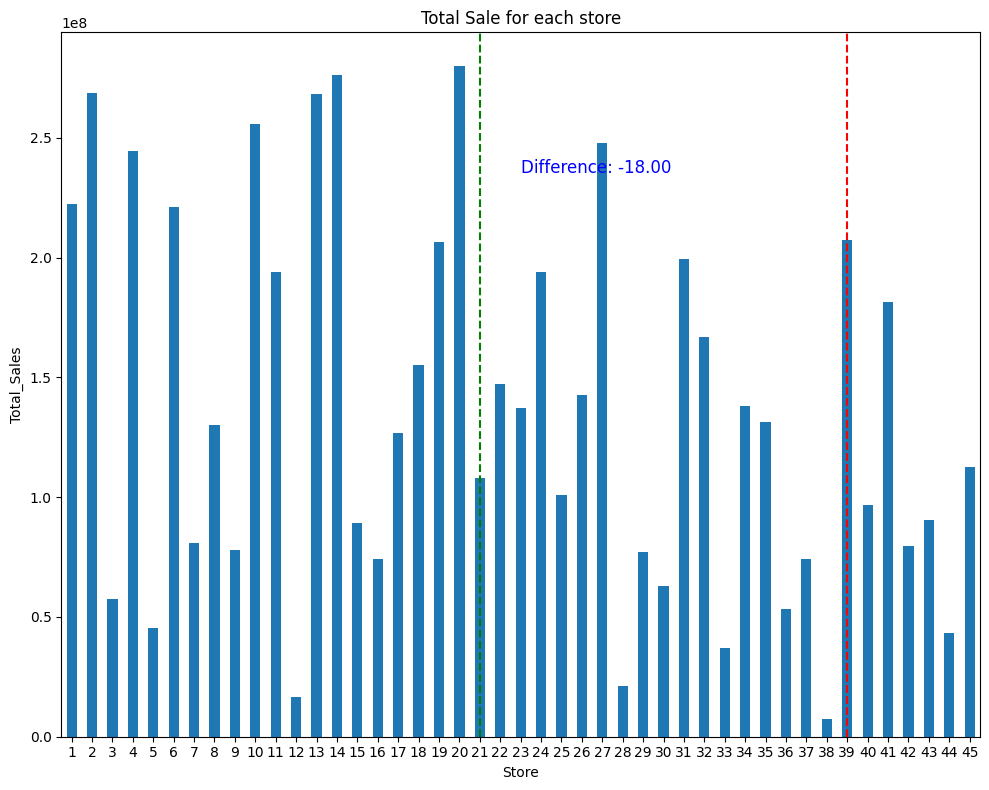

In [45]:
plt.figure(figsize=(10,8))
store_sale.plot(kind='bar')
plt.xlabel('Store')
plt.ylabel('Total_Sales')
plt.title('Total Sale for each store')
plt.xticks(rotation=0)

plt.axvline(x=worst_performing_sotre,color='red',linestyle='--',label=worst_performing_sotre)
plt.axvline(x=best_performing_sotre,color='green',linestyle='--',label=best_performing_sotre)
plt.annotate(f'Difference: {Store_diff:.2f}', xy=(0.5, 0.8), xycoords='axes fraction', fontsize=12, color='blue')
plt.tight_layout()
plt.show()

### Modeling...

In [46]:
# Data Spliting...
y=data.iloc[:,1:2]  #Independent Variables
x=data.iloc[:,0&1:] #Target Variables

In [47]:
x=x.drop(['Weekly_Sales'],axis=1)

In [48]:
x

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,year
0,1,0,42.31,2.572,211.096358,8.106,5,02,2010
1,1,1,38.51,2.548,211.242170,8.106,12,02,2010
2,1,0,39.93,2.514,211.289143,8.106,19,02,2010
3,1,0,46.63,2.561,211.319643,8.106,26,02,2010
4,1,0,46.50,2.625,211.350143,8.106,5,03,2010
...,...,...,...,...,...,...,...,...,...
6430,45,0,64.88,3.997,192.013558,8.684,28,09,2012
6431,45,0,64.89,3.985,192.170412,8.667,5,10,2012
6432,45,0,54.47,4.000,192.327265,8.667,12,10,2012
6433,45,0,56.47,3.969,192.330854,8.667,19,10,2012


In [49]:
y

,Weekly_Sales
0,1643690.90
1,1641957.44
2,1611968.17
3,1409727.59
4,1554806.68
...,...
6430,713173.95
6431,733455.07
6432,734464.36
6433,718125.53


In [50]:
# Data Splitting into Train and Test...

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [51]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4733, 9)
(1184, 9)
(4733, 1)
(1184, 1)


In [52]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

* Linear Regression*

Train Accuracy Score: 0.12921268341860803
Test Accuracy Score: 0.13666651359514315
MSE: 272324097069.2207
MAE: 434866.6862946202
RMSE: 521846.81379617593


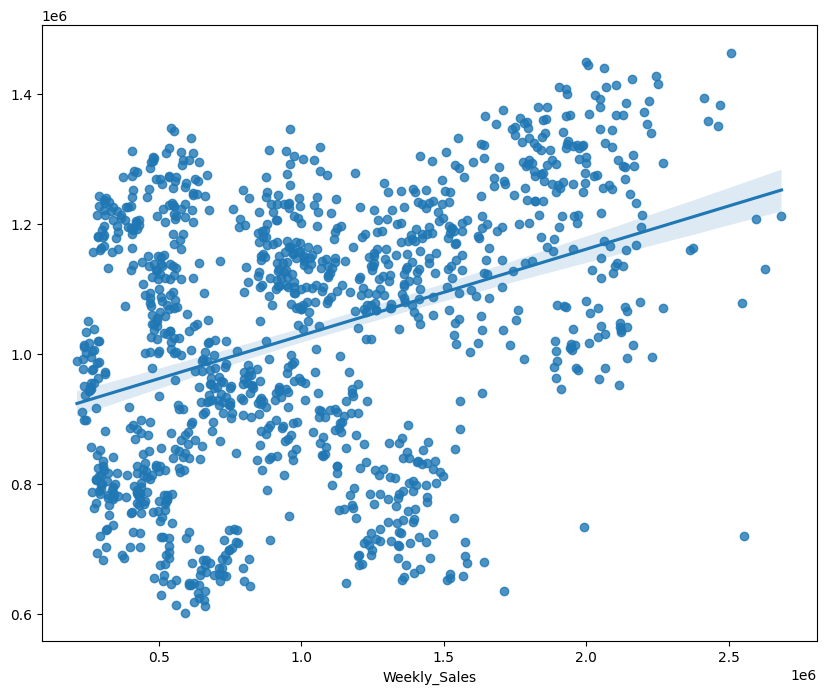

In [53]:
# Linear Regression:

lr=LinearRegression()
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)

print('* Linear Regression*\n')

print('Train Accuracy Score:', lr.score(x_train,y_train))
print('Test Accuracy Score:', r2_score(y_test,lr_pred))

print('MSE:',metrics.mean_squared_error(y_test,lr_pred))
print('MAE:',metrics.mean_absolute_error(y_test,lr_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,lr_pred)))

if y_test is not None and lr_pred is not None:
    if len(y_test) > 1 and len(lr_pred) > 1:
        plt.figure(figsize=(10, 8))
        sns.regplot(x=y_test, y=lr_pred)  # Corrected here
    else:
        print("Invalid input arrays: y_test or lr_pred have insufficient length.")
else:
    print("Invalid input arrays: y_test or lr_pred are None.")

* Random Forest Regressor*

Train Accuracy Score: 0.9948750875765835
Test Accuracy Score: 0.30205751935141323
MSE: 220154272760.07162
MAE: 256916.7057257601
RMSE: 469206.00247660046


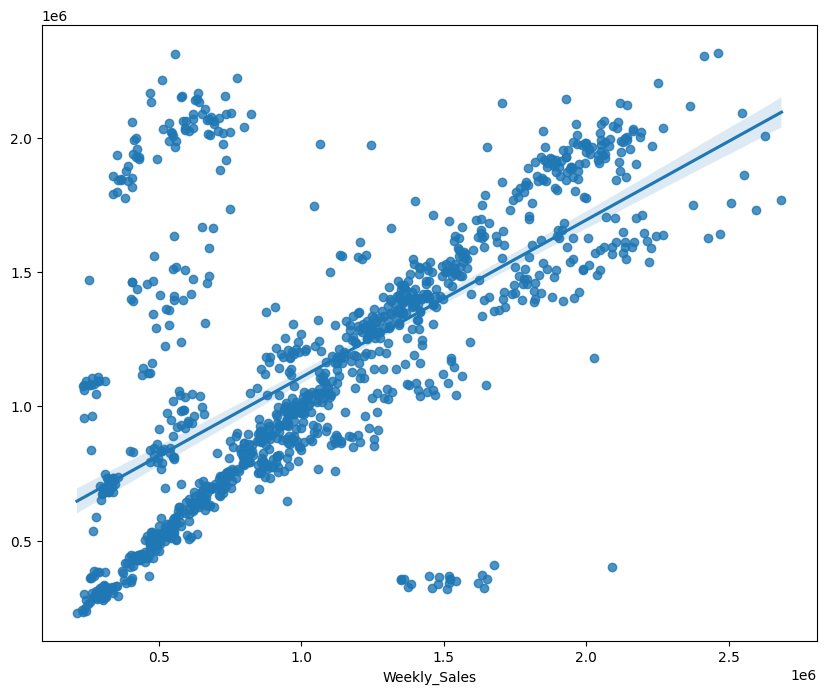

In [54]:
# Random Forest


rdf=RandomForestRegressor()
rdf.fit(x_train,y_train)
rdf_pred=rdf.predict(x_test)

print('* Random Forest Regressor*\n')

print('Train Accuracy Score:', rdf.score(x_train,y_train))
print('Test Accuracy Score:', r2_score(y_test,rdf_pred))

print('MSE:',metrics.mean_squared_error(y_test,rdf_pred))
print('MAE:',metrics.mean_absolute_error(y_test,rdf_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,rdf_pred)))

if y_test is not None and rdf_pred is not None:
    if len(y_test) > 1 and len(rdf_pred) > 1:
        plt.figure(figsize=(10, 8))
        sns.regplot(x=y_test, y=rdf_pred)
    else:
        print("Invalid input arrays: y_test or rdf_pred have insufficient length.")
else:
    print("Invalid input arrays: y_test or rdf_pred are None.")

* Decision Tree Regressor*

Train Accuracy Score: 1.0
Test Accuracy Score: 0.1437809097216266
MSE: 270079979897.9926
MAE: 285153.55249155406
RMSE: 519692.1972648739


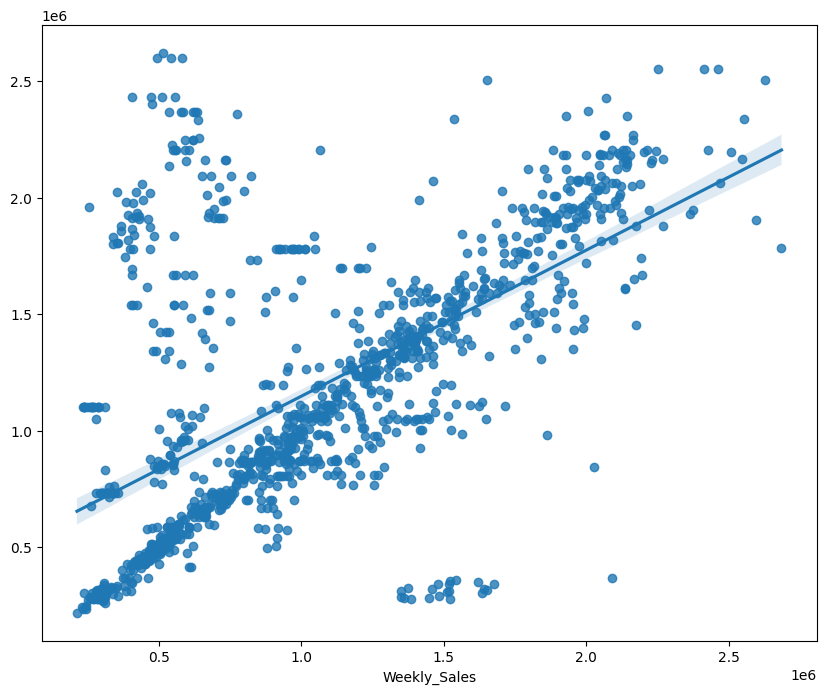

In [55]:
# Decision Tree

dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt_pred=dt.predict(x_test)

print('* Decision Tree Regressor*\n')

print('Train Accuracy Score:', dt.score(x_train,y_train))
print('Test Accuracy Score:', r2_score(y_test,dt_pred))

print('MSE:',metrics.mean_squared_error(y_test,dt_pred))
print('MAE:',metrics.mean_absolute_error(y_test,dt_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,dt_pred)))

if y_test is not None and dt_pred is not None:
    if len(y_test) > 1 and len(dt_pred) > 1:
        plt.figure(figsize=(10, 8))
        sns.regplot(x=y_test, y=dt_pred)
    else:
        print("Invalid input arrays: y_test or dt_pred have insufficient length.")
else:
    print("Invalid input arrays: y_test or dt_pred are None.")

In [56]:
# Cross Validation...

# Linear Regression CV:

lr_scores=cross_val_score(lr,x_train,y_train,cv=10,scoring='r2')
print(lr_scores)
print('LinearRegression_Mean Score:',lr_scores.mean())


# Random Forest CV:

rdf_scores=cross_val_score(rdf,x_train,y_train,cv=10,scoring='r2')
print(rdf_scores)
print('RandomForest_Mean Score:',rdf_scores.mean())


# Decision Tree CV:

dt_scores=cross_val_score(dt,x_train,y_train,cv=10,scoring='r2')
print(dt_scores)
print('Decison_Mean Score:',dt_scores.mean())

[0.13914735 0.13694998 0.10282754 0.12545706 0.08936086 0.13831518
 0.18760952 0.12384174 0.09625674 0.09252671]
LinearRegression_Mean Score: 0.12322926742153487
[0.97752764 0.9643872  0.95856664 0.95824968 0.95013753 0.97241858
 0.97636352 0.94921054 0.96047384 0.94902711]
RandomForest_Mean Score: 0.9616362290824373
[0.95566899 0.94789126 0.93972631 0.92927473 0.9373246  0.95943692
 0.95809124 0.93045994 0.94510002 0.93193582]
Decison_Mean Score: 0.9434909817220699


In [57]:
# Combines Score display...

print('LinearReg_Train Accuracy Score:', lr.score(x_train,y_train))
print('LinearRef_Test Accuracy Score:', r2_score(y_test,lr_pred))
print('LinearRegression_Mean Score:',lr_scores.mean())

print('************\n')

print('RandomForest_Train Accuracy Score:', rdf.score(x_train,y_train))
print('RandomForest_Test Accuracy Score:', r2_score(y_test,rdf_pred))
print('RandomForest_Mean Score:',rdf_scores.mean())

print('************\n')
print('DecisonTree_Train Accuracy Score:', dt.score(x_train,y_train))
print('DecisionTree_Test Accuracy Score:', r2_score(y_test,dt_pred))
print('Decison_Mean Score:',dt_scores.mean())

LinearReg_Train Accuracy Score: 0.12921268341860803
LinearRef_Test Accuracy Score: 0.13666651359514315
LinearRegression_Mean Score: 0.12322926742153487
************

RandomForest_Train Accuracy Score: 0.9948750875765835
RandomForest_Test Accuracy Score: 0.30205751935141323
RandomForest_Mean Score: 0.9616362290824373
************

DecisonTree_Train Accuracy Score: 1.0
DecisionTree_Test Accuracy Score: 0.1437809097216266
Decison_Mean Score: 0.9434909817220699


#### As per above score RandomForest model is giving the higest score of 96% which is better than other models...

### Model Forcasting By Prophet Library...

#### Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks

In [58]:
df=pd.read_csv('Walmart.csv',parse_dates=['Date'])

In [59]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [60]:
Max_Sale=df['Weekly_Sales'].max()
Max_Sale

3818686.45

In [61]:
Min_Sale=df['Weekly_Sales'].min()
Min_Sale

209986.25

In [62]:
total_sale=df.groupby('Date')['Weekly_Sales',].sum().reset_index()

In [63]:
total_sale

,Date,Weekly_Sales
0,01-04-2011,43458991.19
1,01-06-2012,48281649.72
2,01-07-2011,47578519.50
3,01-10-2010,42239875.87
4,02-03-2012,46861034.97
...,...,...
138,30-07-2010,44630363.42
139,30-09-2011,42195830.81
140,30-12-2011,46042461.04
141,31-08-2012,47159639.43


In [64]:
total_sale.columns = ['ds', 'y']
total_sale['ds'] = pd.to_datetime(total_sale['ds'], format='%d-%m-%Y')

In [65]:
total_sale

,ds,y
0,2011-04-01,43458991.19
1,2012-06-01,48281649.72
2,2011-07-01,47578519.50
3,2010-10-01,42239875.87
4,2012-03-02,46861034.97
...,...,...
138,2010-07-30,44630363.42
139,2011-09-30,42195830.81
140,2011-12-30,46042461.04
141,2012-08-31,47159639.43


In [66]:
# Assuming 'Weekly_Sales' is the column you want to forecast
total_sale.rename(columns={'Weekly_Sales': 'y'}, inplace=True)
total_sale['ds'] = pd.date_range(start='2024-01-01', periods=len(total_sale))  # Assuming dates for your sales data

# Now, select only the 'ds' and 'y' columns
total_sale = total_sale[['ds', 'y']]

In [67]:
model = Prophet(interval_width=0.95)
model.fit(total_sale)
future = model.make_future_dataframe(periods=12)
future.tail(12)

00:17:03 - cmdstanpy - INFO - Chain [1] start processing
00:17:03 - cmdstanpy - INFO - Chain [1] done processing


,ds
143,2024-05-23
144,2024-05-24
145,2024-05-25
146,2024-05-26
147,2024-05-27
148,2024-05-28
149,2024-05-29
150,2024-05-30
151,2024-05-31
152,2024-06-01


In [68]:
forcast = model.predict(future)
forcast.tail(12)
forcast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
150,2024-05-30,4.659045e+07,3.584382e+07,5.694412e+07
151,2024-05-31,4.612968e+07,3.525446e+07,5.704679e+07
152,2024-06-01,4.671225e+07,3.604219e+07,5.638346e+07
153,2024-06-02,4.503321e+07,3.464478e+07,5.584625e+07
154,2024-06-03,4.691475e+07,3.604938e+07,5.790706e+07


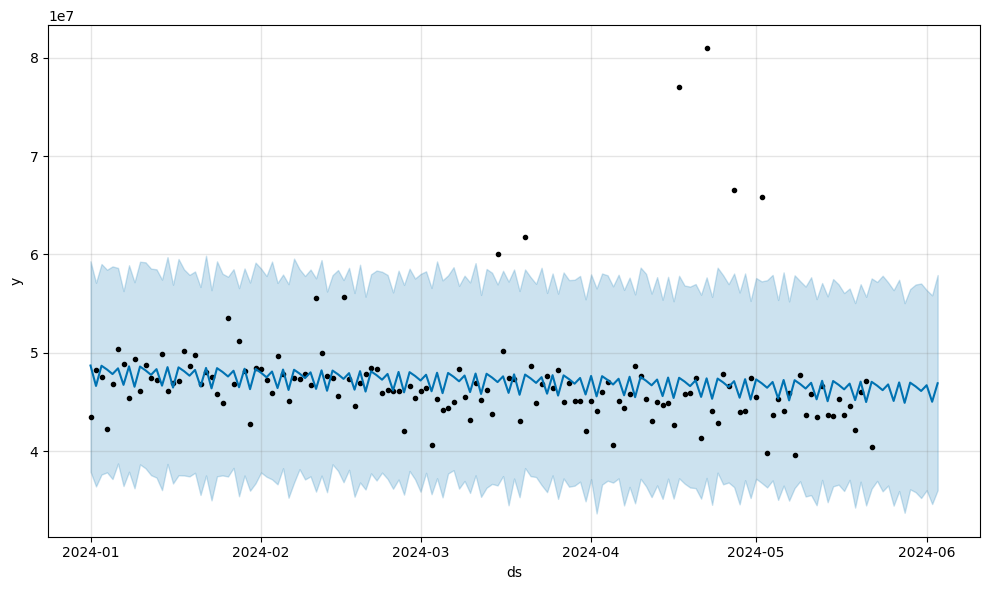

In [69]:
total_sale_plot=model.plot(forcast)

#### The above graph is showing the future predicted values for 12 weeks

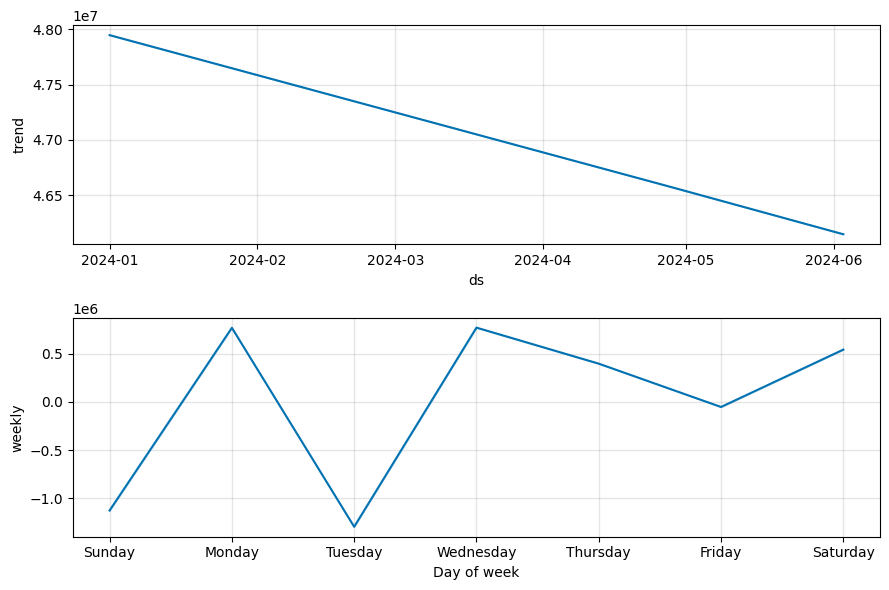

In [70]:
total_sale_forcast_plot1=model.plot_components(forcast)

#### As per the above graphs we can find that sales dropped in Jan and it has maintained a consistent high from mid Feb and till November mid and again at the end of November sales will go up due to public holidays yearly...